# More fun with pandas: Brightness vs Distance

This notebook will review the basics of creating a pandas dataframe and introduce you to some more advanced functions. You'll also get to analyze the data you collected in the distance vs brightness lab.

First, import the pandas and matplotlib libraries.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Next, create 6 lists: 3 that contain your distance measurements from each experimental run and 3 that contain your brightness measurements from each experimental run.

In [2]:
# Fill in the lists below

dist1 = [10,20,30,40,50,60,70,80,90,100]
dist2 = [10,20,30,40,50,60,70,80,90,100]
dist3 = [10,20,30,40,50,60,70,80,90,100]
brt1 = [770,595.6,280,165.2,112.1,81.9,62.5,50,40.3,33.7]
brt2 = [770,629.2,290.8,170.2,114.1,82.6,63.1,50.3,40.5,34]
brt3 = [770,625.6,289.7,169.7,114.3,82.9,63.1,50.2,40.7,34]

Now we'll create a dataframe based on these lists using the pandas .DataFrame() function.

In [3]:
df = pd.DataFrame({"distance 1": dist1, "distance 2": dist2, "distance 3": dist3, 
                   "brightness 1": brt1, "brightness 2": brt2, "brightness 3": brt3})

# See those {curly brackets}? This means we're using a dictionary!

Look at the first 5 lines of our dataframe using the .head() function

In [4]:
df.head()

,brightness 1,brightness 2,brightness 3,distance 1,distance 2,distance 3
0,770.0,770.0,770.0,10,10,10
1,595.6,629.2,625.6,20,20,20
2,280.0,290.8,289.7,30,30,30
3,165.2,170.2,169.7,40,40,40
4,112.1,114.1,114.3,50,50,50


You can think of the numbers (0,1,2,3,4,5) as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. They will help us identify and work with particular rows.

Notice that the strings we chose in the .DataFrame() function have become the column headers and the items from the lists are the column values. 

What order are the columns in?

## Dataframe columns

Let's take a closer look at the columns of our dataframe

In [5]:
df.columns #this command gives us the column names

Index(['brightness 1', 'brightness 2', 'brightness 3', 'distance 1',
       'distance 2', 'distance 3'],
      dtype='object')

In [6]:
df.dtypes #this command tells us what type of values are in each column

brightness 1    float64
brightness 2    float64
brightness 3    float64
distance 1        int64
distance 2        int64
distance 3        int64
dtype: object

Assign the "brightness 1" column to the variable b1 and the "distance 1" column to the variable d1 using the df['column_name'] index format.

In [7]:
b1=df["brightness 1"]
d1=df["distance 1"]

Now, use the .head() function to look at the first 10 values in each column.

In [9]:
b1.head(10)
d1.head(10)

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
Name: distance 1, dtype: int64

pandas has some great built in functions that we can use to analyze the data in a column. 

In [10]:
b1.count() #this command returns number of values in the selected data

10

In [11]:
b1.sum() #this command returns the sum of all values in the selected data

2191.3000000000002

In [12]:
b1.max() #this command returns the maximum value of the selected data

770.0

In [13]:
b1.min() #this command returns the maximum value of the selected data

33.700000000000003

In [14]:
b1.mean() #this command returns the mean value of the selected data

219.13000000000002

Try it yourself! Print out the count, sum, max, min, and mean of the first distance column:

In [17]:
print(d1.count())
print(d1.sum())
print(d1.max())
print(d1.min())
print(d1.mean())

10
550
100
10
55.0


## Adding to a dataframe

You have three columns for brightness and three columns for distance, but we're interested in the average for each.

We can add a new column to our dataframe that contains the average brightness value like this:

In [18]:
df["avg brightness"] = df[["brightness 1", "brightness 2", "brightness 3"]].mean(axis=1)

# Notes:
# "avg brightness" is the name of the new column
# We are specifying which columns to average together using an index in brackets
# We're using the pandas .mean() function again!
# axis=1 specifies that pandas should find the mean across columns. 
# (axis=0 would tell pandas to find the mean across rows)
df.head(5)

,brightness 1,brightness 2,brightness 3,distance 1,distance 2,distance 3,avg brightness
0,770.0,770.0,770.0,10,10,10,770.000000
1,595.6,629.2,625.6,20,20,20,616.800000
2,280.0,290.8,289.7,30,30,30,286.833333
3,165.2,170.2,169.7,40,40,40,168.366667
4,112.1,114.1,114.3,50,50,50,113.500000


What is the data type of the "avg brightness" column?

In [19]:
avgB = df["avg brightness"] # We'll assign this column to a variable for convenience

avgB.dtypes # Now we'll run the .dytypes command on just this column

dtype('float64')

Let's compare this to the rest of the columns

In [20]:
df.dtypes

brightness 1      float64
brightness 2      float64
brightness 3      float64
distance 1          int64
distance 2          int64
distance 3          int64
avg brightness    float64
dtype: object

Your turn! Create another column called "avg distance" that contains the average distance for each step in the experiment.

In [21]:
df["avg distance"] = df[["distance 1", "distance 2", "distance 3"]].mean(axis=1)

Now, store this column in a variable called avgD and print out the first 5 values in that column:

In [22]:
avgD=df["avg distance"]
avgD.head()

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
Name: avg distance, dtype: float64

Print out the max and min of the "avg brightness" and "avg distance" columns

In [23]:
# avg brightness
print(avgB.min())
print(avgB.max())

# avg distance
print(avgD.min())
print(avgD.max())


33.9
770.0
10.0
100.0


## Sorting dataframes

Now let's do some more data analysis using pandas. We can use the .sort_values() function to sort our data by average brightness.

In [24]:
df_sorted = df.sort_values(["avg distance"]) # specify the column that you want to use for the sort using an index
df_sorted.head(10) # Look at the first 10 lines of the sorted file

,brightness 1,brightness 2,brightness 3,distance 1,distance 2,distance 3,avg brightness,avg distance
0,770.0,770.0,770.0,10,10,10,770.000000,10.0
1,595.6,629.2,625.6,20,20,20,616.800000,20.0
2,280.0,290.8,289.7,30,30,30,286.833333,30.0
3,165.2,170.2,169.7,40,40,40,168.366667,40.0
4,112.1,114.1,114.3,50,50,50,113.500000,50.0
5,81.9,82.6,82.9,60,60,60,82.466667,60.0
6,62.5,63.1,63.1,70,70,70,62.900000,70.0
7,50.0,50.3,50.2,80,80,80,50.166667,80.0
8,40.3,40.5,40.7,90,90,90,40.500000,90.0
9,33.7,34.0,34.0,100,100,100,33.900000,100.0


Look at the distances in this sorted dataframe. Are the distances associated with the lowest brightness values large or small?

What if we want to look at the highest brightness values? We can sort the data in reverse by adding another argument to the sort_values() function.

In [25]:
# set the ascending argument to False to sort values from highest to lowest
df_sorted = df.sort_values(["avg distance"], ascending = False)
df_sorted.head(10)

,brightness 1,brightness 2,brightness 3,distance 1,distance 2,distance 3,avg brightness,avg distance
9,33.7,34.0,34.0,100,100,100,33.900000,100.0
8,40.3,40.5,40.7,90,90,90,40.500000,90.0
7,50.0,50.3,50.2,80,80,80,50.166667,80.0
6,62.5,63.1,63.1,70,70,70,62.900000,70.0
5,81.9,82.6,82.9,60,60,60,82.466667,60.0
4,112.1,114.1,114.3,50,50,50,113.500000,50.0
3,165.2,170.2,169.7,40,40,40,168.366667,40.0
2,280.0,290.8,289.7,30,30,30,286.833333,30.0
1,595.6,629.2,625.6,20,20,20,616.800000,20.0
0,770.0,770.0,770.0,10,10,10,770.000000,10.0


Are the distances associated with the largest brightness values large or small?

## Saving a dataframe as a csv file

You can export your dataframe to your computer as a csv using the .to_csv() function.

In [26]:
df.to_csv("lab_averages.csv", index=False) # index=False removes the index column (1, 2, 3...) from our dataset

## Graphing data from a dataframe

Create a pyplot line graph using the average distance as the x data and the average brightness as the y data. 

Try creating markers to show each data point.

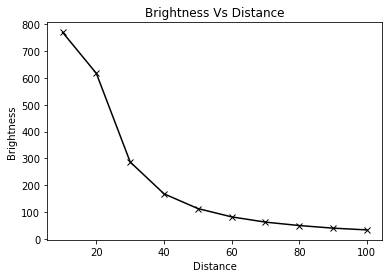

In [31]:
plt.plot(avgD,avgB , color = "black", marker = "x")
plt.title("Brightness Vs Distance")
plt.xlabel("Distance")
plt.ylabel("Brightness")

plt.show()